In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict

In [2]:
mybl_lang = pd.read_csv('mybl_lang.csv')
mybl_lang = mybl_lang.loc[mybl_lang['name'] != 'Swift']
mybl_lang.drop('id', axis=1, inplace=True)

In [3]:
mybl_lang = mybl_lang.sort_values(by='date_added')

In [4]:
langs = mybl_lang.pivot(index='date_added', columns='name', values=['val', 'val_noexp', 'res_vac'])
langs.dropna(inplace=True)

In [5]:
Mind = pd.MultiIndex.from_tuples([('res', i) for i in langs['val'].columns])
langs_res = langs['res_vac'] * langs['val']
langs_res.columns = Mind
langs = pd.merge(langs, langs_res, how='left', on='date_added')
langs0 = langs.copy()

In [6]:
#normalization
for i in langs.columns:
    langs[i] = langs[i]/(max(langs[i]))

langs.describe()

val                                                        \
                1c         ABAP      Android Data scientist       DevOps   
count  1593.000000  1593.000000  1593.000000    1593.000000  1593.000000   
mean      0.764048     0.338638     0.457388       0.685039     0.613615   
std       0.109945     0.258570     0.243362       0.140656     0.127655   
min       0.556455     0.065000     0.131118       0.413926     0.359270   
25%       0.665067     0.150000     0.282175       0.566731     0.527550   
50%       0.745307     0.210000     0.366767       0.682785     0.590097   
75%       0.859292     0.410000     0.652568       0.802708     0.679449   
max       1.000000     1.000000     1.000000       1.000000     1.000000   

                                                                        ...  \
          Frontend       Golang         Java   Javascript       Python  ...   
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000  ...   
mean      0.487968     0.719494     0.506443     0.495052     0.605217  ...   
std       0.225269     0.142214     0.207145     0.216575     0.143971  ...   
min       0.186754     0.432937     0.174391     0.227146     0.365318  ...   
25%       0.352212     0.607810     0.385021     0.353078     0.518933  ...   
50%       0.391294     0.704584     0.453547     0.393190     0.567986  ...   
75%       0.632577     0.848896     0.569295     0.620802     0.628657  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               res                                                      \
            Golang         Java   Javascript       Python         Ruby   
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000   
mean      0.323829     0.624221     0.686251     0.557623     0.736764   
std       0.228515     0.180657     0.156934     0.224902     0.134316   
min       0.062470     0.358703     0.427436     0.208371     0.549493   
25%       0.119943     0.459523     0.556373     0.337375     0.607008   
50%       0.274869     0.605428     0.681053     0.562422     0.723631   
75%       0.450947     0.771832     0.816237     0.744591     0.845770   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                                                                        
             Scala          cpp           cs          iOS          php  
count  1593.000000  1593.000000  1593.000000  1593.000000  1593.000000  
mean      0.688203     0.648957     0.664239     0.682877     0.692696  
std       0.157871     0.177872     0.153107     0.194831     0.142701  
min       0.424685     0.400186     0.424231     0.367613     0.507464  
25%       0.575979     0.487738     0.517425     0.501262     0.577060  
50%       0.662022     0.603858     0.655938     0.698690     0.652353  
75%       0.825776     0.805330     0.780152     0.855553     0.810499  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 64 columns]

([<matplotlib.axis.XTick at 0x162f4f26990>,
 [Text(281.0, 0, '2022-01-01'), Text(646.0, 0, '2023-01-01')])

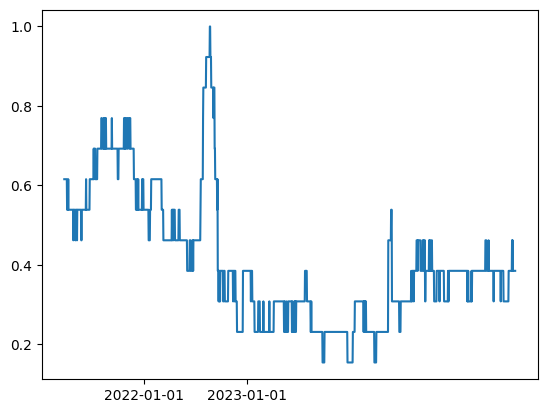

In [7]:
plt.plot(langs["val_noexp", "cpp"])
plt.xticks(['2022-01-01', '2023-01-01'])

In [8]:
def derivative(column, window):
    colmns = langs[column].columns

    langs1 = langs[column].copy()
    langs2 = langs[column].copy()

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    labels_val = OrderedDict()

    for c in colmns:
        langs1[c] = langs1[c].rolling(window=window).mean()
        langs2[c] = langs2[c].rolling(window=window).mean()
        langs2[c] = langs2[c].shift(window)
        labels_val[c] = (langs1[c] - langs2[c])[-1]

    labels = [k for k, v in sorted(labels_val.items(), key=lambda item: item[1], reverse=True)]

    for i, l in enumerate(labels):   
        if i < 10:
            ax.plot(langs1[l] - langs2[l])
        else:
            ax.plot(langs1[l] - langs2[l], linestyle='--')

    ax.legend(labels, loc='upper left')
    ax.axhline(y=0, color='k')
    plt.xticks('')
    #colmns = langs1.iloc[0].sort_values(ascending=False).index

C:\Users\ksn\AppData\Local\Temp\ipykernel_8440\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


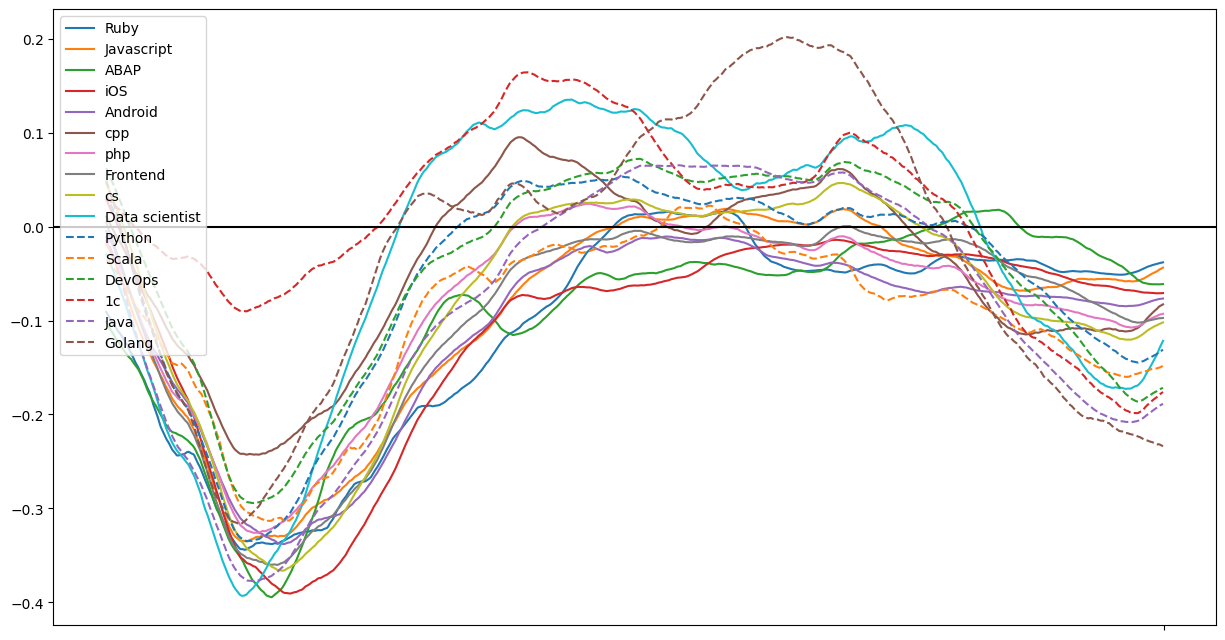

In [9]:
derivative('val', 200)

C:\Users\ksn\AppData\Local\Temp\ipykernel_8440\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


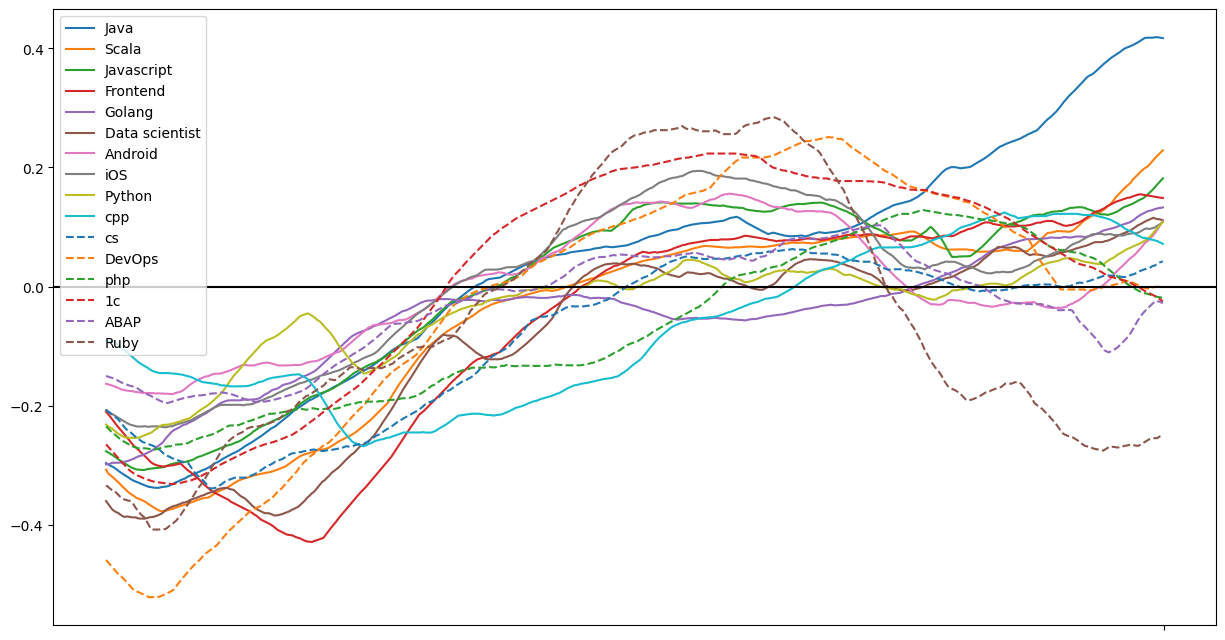

In [10]:
derivative('val_noexp', 300)

C:\Users\ksn\AppData\Local\Temp\ipykernel_8440\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


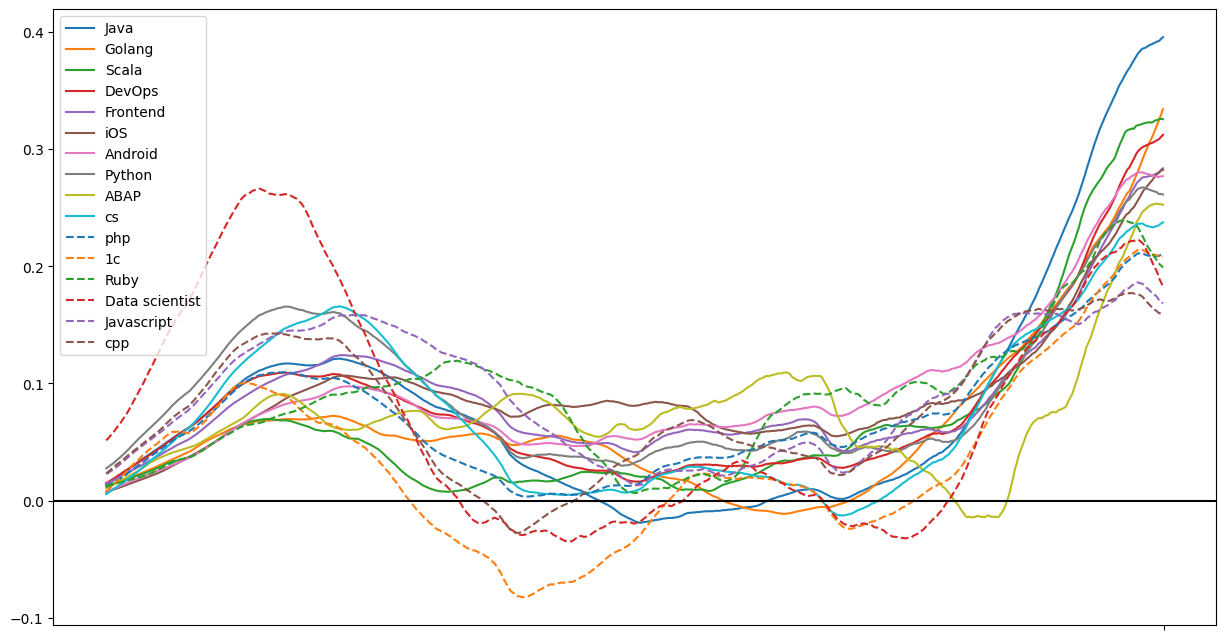

In [11]:
derivative('res_vac', 200)

C:\Users\ksn\AppData\Local\Temp\ipykernel_8440\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


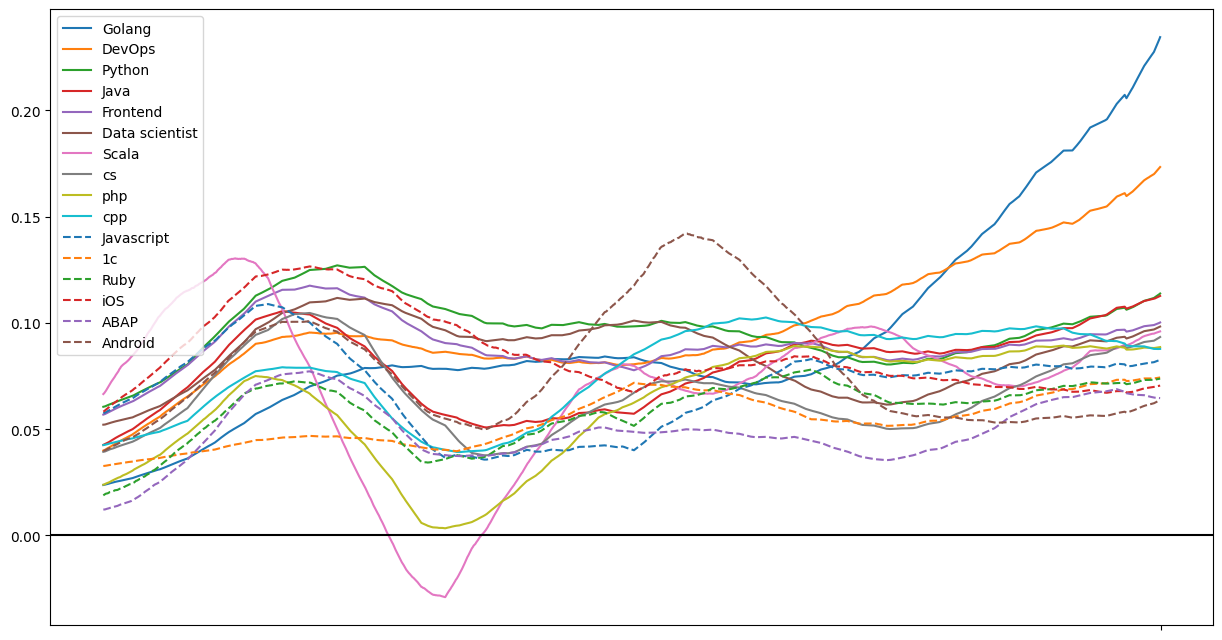

In [12]:
derivative('res', 200)

In [13]:
import seaborn as sns

def corr_matrix(colmns):
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1.0)
    sns.heatmap(pd.DataFrame(langs[colmns]).corr(),cmap='GnBu',annot=True)

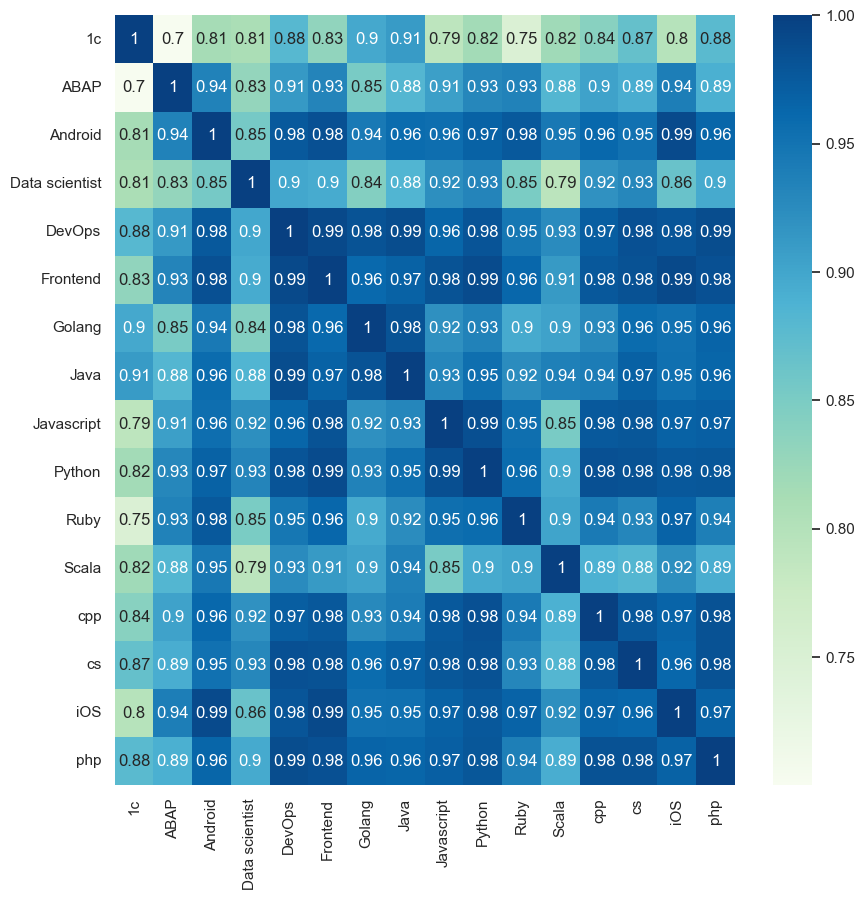

In [14]:
corr_matrix('res_vac')

In [15]:
langs.index = pd.to_datetime(langs.index)

def year(x):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 4)
    plt.plot(langs[x].groupby(langs.index.strftime('%m-%d')).median().median(axis=1))
    plt.xticks([str(i).zfill(2) + "-01" for i in range(1, 13)])
    plt.grid()

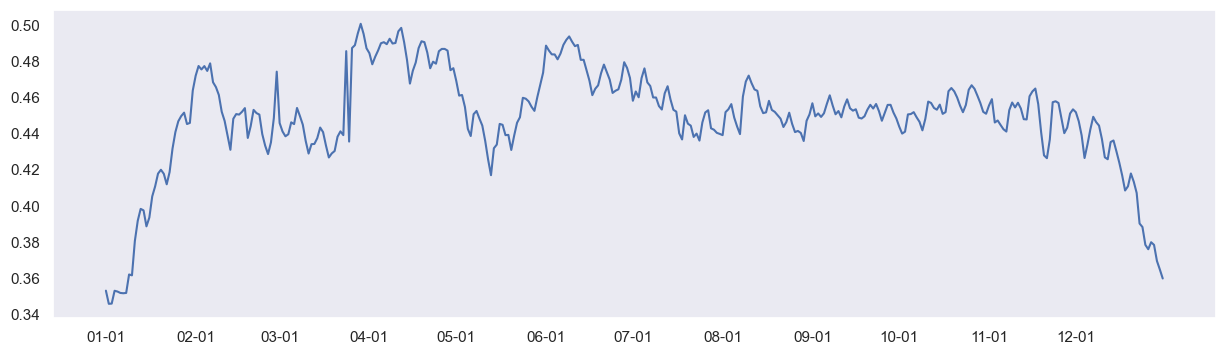

In [16]:
year("val")

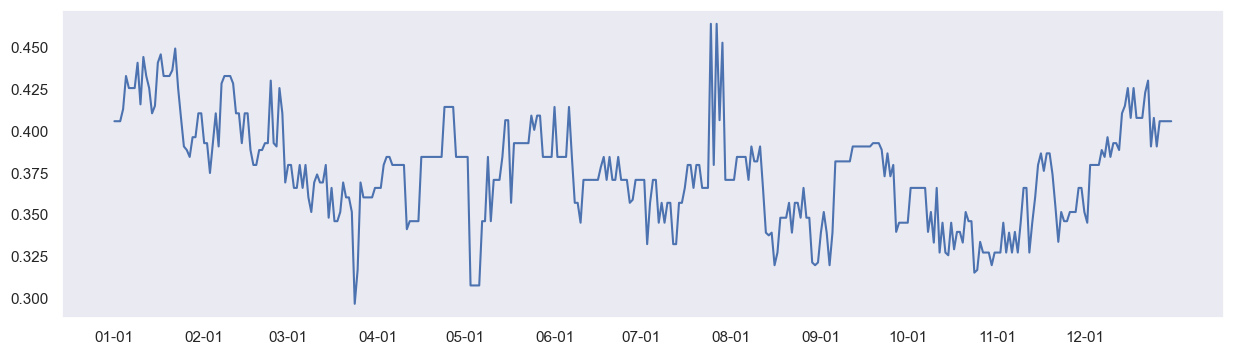

In [17]:
year("val_noexp")

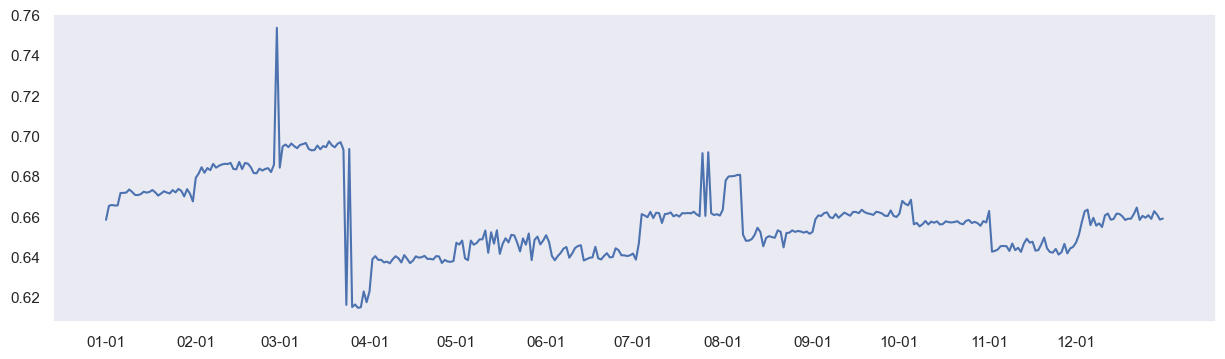

In [18]:
year("res")

In [19]:
def normalize(column, window):
    langs1 = langs[column].copy()
    colmns = langs1.iloc[0].sort_values(ascending=False).index

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    labels = []

    for i, c in enumerate(colmns):
        langs1[c] = langs1[c].rolling(window=window).mean()

        if i < 10:
            ax.plot(langs1[c])
            labels.append(langs1[c].name)
        else:
            ax.plot(langs1[c], linestyle='--')
            labels.append(langs1[c].name)

    ax.legend(labels)

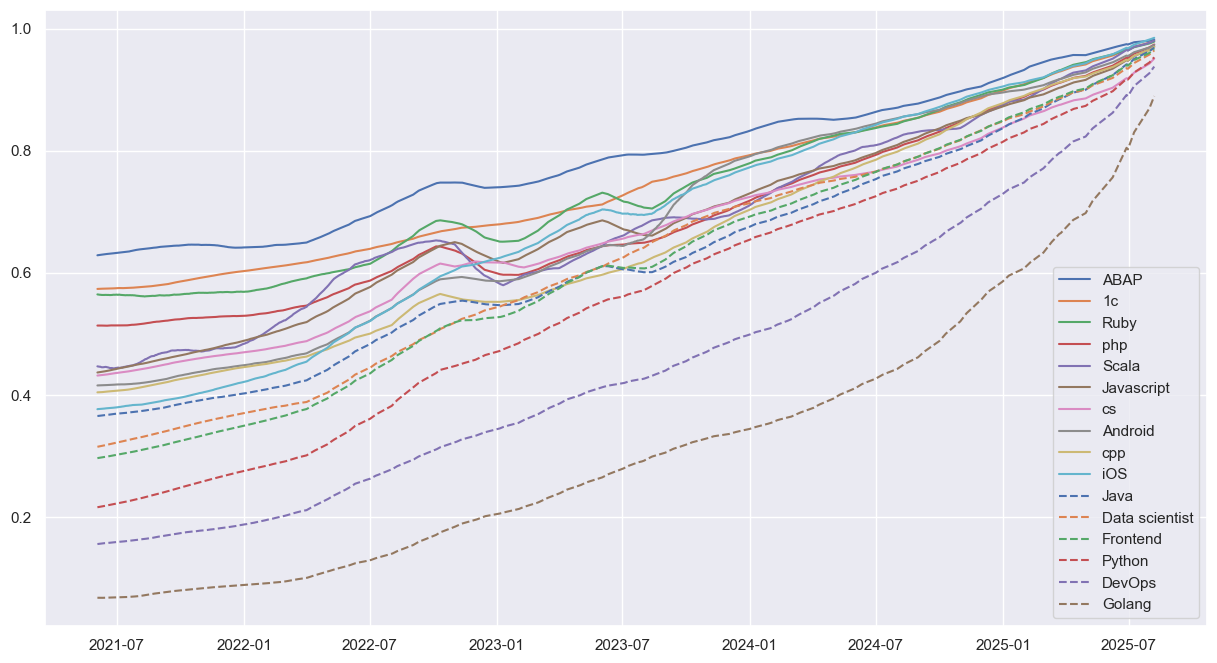

In [20]:
normalize("res", 70)

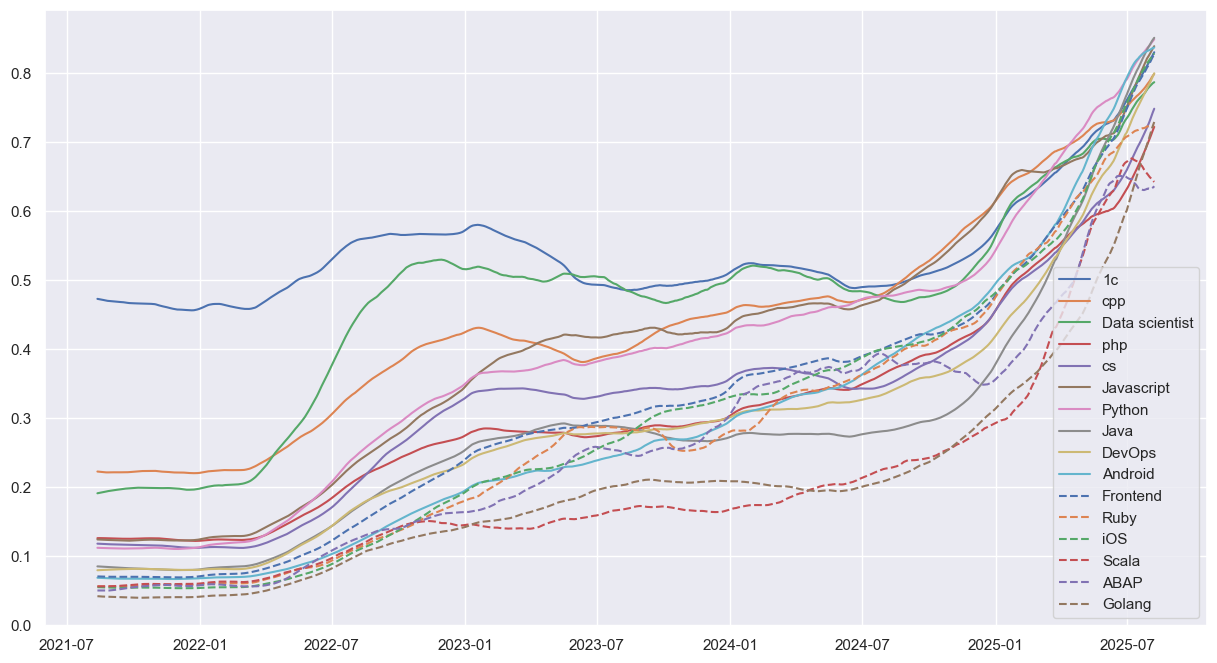

In [21]:
normalize("res_vac", 140)

In [22]:
langs.res.loc['2021-03']

1c      ABAP   Android  Data scientist    DevOps  Frontend  \
date_added                                                                     
2021-03-26  0.572049  0.616705  0.410038        0.308341  0.153365  0.290153   
2021-03-27  0.571480  0.629291  0.414289        0.308075  0.151299  0.291698   
2021-03-28  0.570060  0.626621  0.415550        0.308986  0.147702  0.290940   
2021-03-29  0.572904  0.626087  0.413290        0.307903  0.153599  0.289147   
2021-03-30  0.572435  0.629291  0.417277        0.308122  0.148390  0.290714   
2021-03-31  0.574115  0.620442  0.411360        0.309038  0.151069  0.292154   

              Golang      Java  Javascript    Python      Ruby     Scala  \
date_added                                                                 
2021-03-26  0.068202  0.363522    0.428931  0.209022  0.570552  0.457200   
2021-03-27  0.066883  0.359355    0.433074  0.208371  0.570552  0.451449   
2021-03-28  0.065941  0.360996    0.434626  0.209418  0.577631  0.445698   
2021-03-29  0.068023  0.358703    0.428110  0.209906  0.566305  0.448573   
2021-03-30  0.065683  0.362162    0.429253  0.209505  0.565066  0.462951   
2021-03-31  0.065683  0.360501    0.428432  0.209022  0.568723  0.471577   

                 cpp        cs       iOS       php  
date_added                                          
2021-03-26  0.403914  0.428096  0.367613  0.514112  
2021-03-27  0.403243  0.426312  0.375466  0.511059  
2021-03-28  0.400261  0.428219  0.370177  0.513010  
2021-03-29  0.401778  0.428068  0.372201  0.510080  
2021-03-30  0.402635  0.426998  0.368194  0.510436  
2021-03-31  0.402080  0.425123  0.377449  0.511212

In [23]:
langs0.index = pd.to_datetime(langs0.index)
res = pd.DataFrame(columns=langs0.res.loc['2021-03'].columns)

In [24]:
for i in sorted(set(langs0.res.index.strftime('%Y-%m'))):
    res.loc[i] = langs0.res.loc[i].mean()

In [25]:
langs0.res.loc['2021-03'].columns

Index(['1c', 'ABAP', 'Android', 'Data scientist', 'DevOps', 'Frontend',
       'Golang', 'Java', 'Javascript', 'Python', 'Ruby', 'Scala', 'cpp', 'cs',
       'iOS', 'php'],
      dtype='object')